In [4]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.sparse
import scipy.sparse.linalg as spla
from scipy.sparse import csr_matrix, dia_matrix
from matplotlib.animation import ArtistAnimation
from IPython.display import HTML

(-0.5, 1.5)

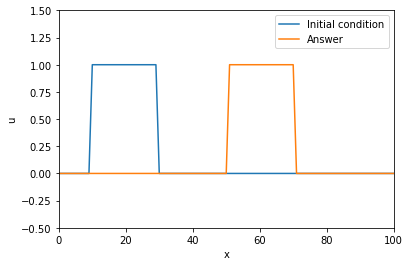

In [5]:
# Creat square wave
Num_stencil_x = 101
x_array = np.arange(Num_stencil_x)
u_array = np.where(((x_array >= 30) |(x_array < 10)), 0.0, 1.0)
u_lower_boundary = 0.0
u_upper_boundary = 0.0
Time_step = 200
Delta_x = max(x_array) / (Num_stencil_x-1)
C = 1
Delta_t = 0.2
CFL = C * Delta_t / Delta_x
total_movement = C * Delta_t * (Time_step+1)
exact_u_array = np.where(((x_array >= 30 + total_movement) |(x_array < 10 + total_movement)), 0.0, 1.0)
plt.plot(x_array, u_array, label="Initial condition")
plt.plot(x_array, exact_u_array, label="Answer")
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("u")
plt.xlim(0, max(x_array))
plt.ylim(-0.5,1.5)

(-0.5, 1.5)

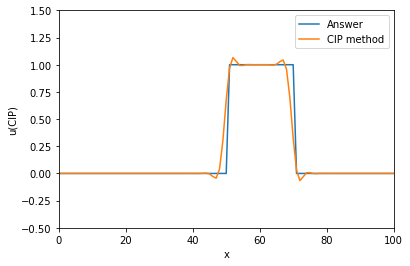

In [6]:
u_cip= u_array.copy()
partial_u_cip = ((np.append(u_cip[1:], u_upper_boundary) + u_cip)/2 - (np.append(u_lower_boundary, u_cip[:-1]) + u_cip)/2)/ Delta_x
# 時間発展させる
for n in range(Time_step):
    u_old = u_cip.copy()
    partial_u_old = partial_u_cip.copy()
    u_cip[0] = 0
    partial_u_cip[0] = 0
    for j in range(1, Num_stencil_x):
        a = (partial_u_old[j] + partial_u_old[j-1]) / Delta_x**2 - 2.0 * (u_old[j] - u_old[j-1]) / Delta_x**3
        b = 3 * (u_old[j-1] - u_cip[j]) / Delta_x**2 + (2.0*partial_u_old[j] + partial_u_old[j-1]) / Delta_x
        c = partial_u_old[j]
        d = u_old[j]
        xi = - C * Delta_t  # C > 0
        u_cip[j:j+1] = a * xi**3 + b * xi**2 + c * xi + d
        partial_u_cip[j:j+1] = 3 * a * xi**2 + 2 * b * xi + c
plt.plot(x_array, exact_u_array, label="Answer")
plt.plot(x_array, u_cip, label="CIP method")
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("u(CIP)")
plt.xlim(0, max(x_array))
plt.ylim(-0.5,1.5)

Wall time: 132 ms


(-0.5, 1.5)

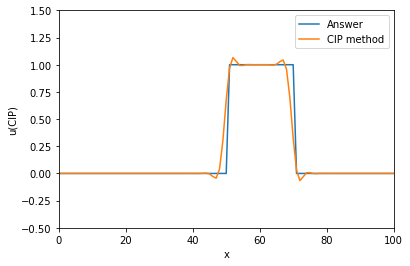

In [8]:
%%time
u_cip= u_array.copy()
partial_u_cip = ((np.append(u_cip[1:], u_upper_boundary) + u_cip)/2 - (np.append(u_lower_boundary, u_cip[:-1]) + u_cip)/2)/ Delta_x
# 時間発展させる
for n in range(Time_step):
    u_old = u_cip.copy()
    partial_u_old = partial_u_cip.copy()
    u_cip[0] = 0
    partial_u_cip[0] = 0
    for j in range(1, Num_stencil_x):
        a = (partial_u_old[j] + partial_u_old[j-1]) / Delta_x**2 - 2.0 * (u_old[j] - u_old[j-1]) / Delta_x**3
        b = 3 * (u_old[j-1] - u_cip[j]) / Delta_x**2 + (2.0*partial_u_old[j] + partial_u_old[j-1]) / Delta_x
        c = partial_u_old[j]
        d = u_old[j]
        xi = - C * Delta_t  # C > 0
        u_cip[j:j+1] = a * xi**3 + b * xi**2 + c * xi + d
        partial_u_cip[j:j+1] = 3 * a * xi**2 + 2 * b * xi + c
plt.plot(x_array, exact_u_array, label="Answer")
plt.plot(x_array, u_cip, label="CIP method")
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("u(CIP)")
plt.xlim(0, max(x_array))
plt.ylim(-0.5,1.5)

(-0.5, 1.5)

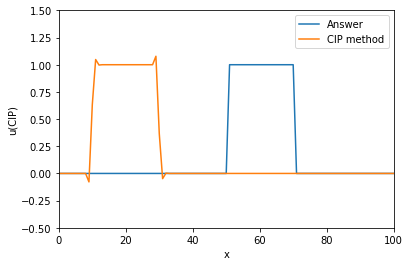

In [9]:
u_cip= u_array.copy()
partial_u_cip = ((np.append(u_cip[1:], u_upper_boundary) + u_cip)/2 - (np.append(u_lower_boundary, u_cip[:-1]) + u_cip)/2)/ Delta_x
# 時間発展させる
for n in range(2):
    u_old = u_cip.copy()
    partial_u_old = partial_u_cip.copy()
    u_cip[0] = 0
    partial_u_cip[0] = 0
    for j in range(1, Num_stencil_x):
        a = (partial_u_old[j] + partial_u_old[j-1]) / Delta_x**2 - 2.0 * (u_old[j] - u_old[j-1]) / Delta_x**3
        b = 3 * (u_old[j-1] - u_cip[j]) / Delta_x**2 + (2.0*partial_u_old[j] + partial_u_old[j-1]) / Delta_x
        c = partial_u_old[j]
        d = u_old[j]
        xi = - C * Delta_t  # C > 0
        u_cip[j:j+1] = a * xi**3 + b * xi**2 + c * xi + d
        partial_u_cip[j:j+1] = 3 * a * xi**2 + 2 * b * xi + c
plt.plot(x_array, exact_u_array, label="Answer")
plt.plot(x_array, u_cip, label="CIP method")
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("u(CIP)")
plt.xlim(0, max(x_array))
plt.ylim(-0.5,1.5)

In [10]:
u_cip= u_array.copy()
partial_u_cip = ((np.append(u_cip[1:], u_upper_boundary) + u_cip)/2 - (np.append(u_lower_boundary, u_cip[:-1]) + u_cip)/2)/ Delta_x

In [11]:
partial_u_cip

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.5,  0.5,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.5, -0.5,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ])

In [13]:
max(x_array)

100

In [14]:
u_cip[j:j+1]

array([0.])

In [16]:
x_array

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [15]:
j

100